In [2]:
import warnings
warnings.simplefilter('ignore')

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1JG5q339aj_QykCt_7a7oBCAMOitLViH6/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('netflix_titles.csv')


## Exploratory Analysis
---


# import library and read csv file

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info() # checking datatype  and row count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.loc[df.duplicated()] # checking duplicate data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [7]:
# we didnt find any duplicated data , now checking unique value per coulmn
for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


checking null values in data

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
con1 = df['director'].apply(lambda x: str(x).split(', ')).tolist() # testing to split data
con1

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

unnesting the directors column, i.e- creating separate lines for each director in a movie


In [10]:
d1= df['director'].apply(lambda x: str(x).split(',')).tolist()
df1= pd.DataFrame(d1,index=df['title'])
df1=df1.stack()
directordf= pd.DataFrame(df1.reset_index())
directordf.rename(columns={0:'Directors'},inplace=True)
directordf.drop(['level_1'],axis=1,inplace=True)
directordf.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


unnesting the cast column, i.e- creating separate lines for each cast member in a movie


In [11]:
castdf = df['cast'].apply(lambda x:str(x).split(',')).tolist()
castdf = pd.DataFrame(castdf,index=df['title'])
castdf = castdf.stack()
castdf = pd.DataFrame(castdf.reset_index())
castdf.rename(columns={0:'Actors'},inplace=True)
castdf.drop(['level_1'],axis=1,inplace=True)
castdf.head()


,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


unnesting the listed_in column, i.e- creating separate lines for each genre in a movie

In [12]:
genredf = df['listed_in'].apply(lambda x: str(x).split(',')).tolist()
genredf = pd.DataFrame(genredf,index=df['title'])
genredf = genredf.stack()
genredf = pd.DataFrame(genredf.reset_index())
genredf.rename(columns={0:'Genre'},inplace=True)
genredf.drop(['level_1'],axis=1,inplace=True)
genredf.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


unnesting the country column, i.e- creating separate lines for each country in a movie

In [13]:
countrydf = df['country'].apply(lambda x: str(x).split(',')).tolist()
countrydf = pd.DataFrame(countrydf,index=df['title'])
countrydf = countrydf.stack()
countrydf = pd.DataFrame(countrydf.reset_index())
countrydf.rename(columns={0:'Country'},inplace=True)
countrydf.drop(['level_1'],axis=1,inplace=True)
countrydf

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


merging the unnested director data with unnested actors data, country, genre data

In [14]:
from functools import reduce
dfs =[directordf,castdf,genredf,countrydf]
df_merged = reduce(lambda  x,y: pd.merge(x,y,on=['title'],how='inner'), dfs)
df_merged

,title,Directors,Actors,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India
202061,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India


merge with original data by selecting required columns

In [15]:
final_df = df_merged.merge(df[['show_id','type','date_added','release_year','title','rating','duration','description']],on=['title'],how='left')
final_df.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [16]:
final_df.isnull().sum() # checking null values now

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
description       0
dtype: int64

In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column

In [17]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
final_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

we have observed that few values of duration are shited to rating columns respectively , so we are getting back those duration value into duration column from rating column.

In [19]:
final_df.loc[final_df['duration'].isnull(),'duration'] = final_df.loc[final_df['duration'].isnull(),'duration'].fillna(final_df['rating']) # getting value from rating to duartion
final_df.loc[final_df['rating'].str.contains('min',na=False),'rating'] ='NR' # replacing value in place min to NR
final_df.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          0
description       0
dtype: int64

In [20]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)
final_df.loc[final_df['rating'].str.contains('min', na=False),'rating']='NR'
final_df['rating'].fillna('NR',inplace=True)
pd.set_option('display.max_rows',None)

In [21]:
final_df.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
description       0
dtype: int64

In [22]:
#just an attempt to observe nulls in date_added column
final_df[final_df['date_added'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
136940,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136941,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136942,A Young Doctor's Notebook and Other Stories,nan,Daniel Radcliffe,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136943,A Young Doctor's Notebook and Other Stories,nan,Jon Hamm,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."
136944,A Young Doctor's Notebook and Other Stories,nan,Jon Hamm,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons,"Set during the Russian Revolution, this comic ..."


date_added filling null with imputed data

In [23]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in final_df.loc[final_df['date_added'].isnull()]['release_year'].unique():

  imp = final_df.loc[final_df['release_year']==i]['date_added'].mode().values[0]
  final_df.loc[final_df['release_year']==i,'date_added'] = final_df.loc[final_df['release_year']==i,'date_added'].fillna(imp)

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director
# and imputes in place of nulls the corresponding mode

for i in final_df[final_df['Country'].isnull()]['Directors'].unique():
  if i in final_df[~final_df['Country'].isnull()]['Directors'].unique():
    imp=final_df[final_df['Directors']==i]['Country'].mode().values[0]
    final_df.loc[final_df['Directors']==i,'Country']=final_df.loc[final_df['Directors']==i,'Country'].fillna(imp)


In [26]:
# filling country data with impute
for i in final_df[final_df['Country'].isnull()]['Actors'].unique():
  if i in final_df[~final_df['Country'].isnull()]['Actors'].unique():
    imp=final_df[final_df['Actors']==i]['Country'].mode().values[0]
    final_df.loc[final_df['Actors']==i,'Country']=final_df.loc[final_df['Actors']==i,'Country'].fillna(imp)
#If there are still nulls, I just replace it by Unknown Country
final_df['Country'].fillna('Unknown Country',inplace=True)
final_df.isnull().sum()

title           0
Directors       0
Actors          0
Genre           0
Country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

replace NAN value in actors , director columns

In [27]:
final_df['Actors'].isna().sum()

0

In [28]:
final_df['Actors'].fillna('Unknown Actor',inplace=True)
final_df.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [29]:
final_df['Actors'].replace('nan','Unknown Actor',inplace=True) # replaced 'nan' with unknown actor
final_df['Directors'].replace('nan','Unkown Director', inplace=True) # replaced 'nan' with unkown director
final_df['Country'].replace('nan','Unkown Country',inplace=True) # replaced 'nan' with unkown country

In [30]:
print(final_df['Actors'].unique())
print(final_df['Directors'].unique())
print(final_df['Country'].unique())

['Unknown Actor' 'Ama Qamata' ' Khosi Ngema' ... ' Malkeet Rauni'
 ' Anita Shabdish' ' Chittaranjan Tripathy']
['Kirsten Johnson' 'Unkown Director' 'Julien Leclercq' ...
 'Majid Al Ansari' 'Peter Hewitt' 'Mozez Singh']
['United States' 'South Africa' 'Unkown Country' 'India' ' Ghana'
 ' Burkina Faso' ' United Kingdom' ' Germany' ' Ethiopia' 'United Kingdom'
 'Germany' ' Czech Republic' 'Mexico' 'Turkey' 'Australia' ' India'
 ' France' 'Finland' 'China' ' Canada' ' United States' ' Japan' 'Nigeria'
 'Japan' 'Spain' 'France' 'Belgium' 'South Korea' ' Singapore'
 ' Australia' ' Mexico' ' Italy' ' Romania' 'Argentina' ' Venezuela'
 ' Hong Kong' 'Russia' 'Canada' 'Hong Kong' ' China' 'Italy' ''
 ' South Korea' 'Ireland' ' Nepal' 'New Zealand' ' Brazil' ' Greece'
 'Jordan' 'Colombia' 'Switzerland' 'Israel' 'Brazil' ' Spain' 'Taiwan'
 ' Nigeria' 'Bulgaria' ' Algeria' 'Poland' ' Israel' 'Saudi Arabia'
 'Thailand' 'Indonesia' 'Egypt' ' Denmark' ' Switzerland' 'Kuwait'
 ' Netherlands' ' Belgium'

In [31]:
final_df.isnull().sum() # finally null value handled

title           0
Directors       0
Actors          0
Genre           0
Country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

In [32]:
final_df.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


Duration seems not in proper format , need to work on this

In [33]:
final_df['duration'].value_counts()

duration
1 Season      35035
2 Seasons      9559
3 Seasons      5084
94 min         4343
106 min        4040
97 min         3624
95 min         3560
96 min         3511
93 min         3480
90 min         3305
105 min        3209
107 min        3103
101 min        3048
102 min        3017
103 min        2985
98 min         2984
99 min         2956
91 min         2915
92 min         2863
104 min        2822
88 min         2781
110 min        2711
100 min        2699
108 min        2614
112 min        2594
85 min         2486
89 min         2420
86 min         2213
4 Seasons      2134
116 min        2122
118 min        2119
87 min         2089
119 min        2075
109 min        2020
113 min        1990
120 min        1845
117 min        1770
121 min        1728
5 Seasons      1698
111 min        1667
124 min        1590
114 min        1529
127 min        1505
115 min        1444
123 min        1398
125 min        1299
122 min        1298
84 min         1268
128 min        1241
130 min    

In [34]:
final_df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [35]:
#replace min with empty string
final_df['duration'] = final_df['duration'].str.replace('min',"")
final_df.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [36]:
final_df['duration'].unique()

array(['90 ', '2 Seasons', '1 Season', '91 ', '125 ', '9 Seasons', '104 ',
       '127 ', '4 Seasons', '67 ', '94 ', '5 Seasons', '161 ', '61 ',
       '166 ', '147 ', '103 ', '97 ', '106 ', '111 ', '3 Seasons', '110 ',
       '105 ', '96 ', '124 ', '116 ', '98 ', '23 ', '115 ', '122 ', '99 ',
       '88 ', '100 ', '6 Seasons', '102 ', '93 ', '95 ', '85 ', '83 ',
       '113 ', '13 ', '182 ', '48 ', '145 ', '87 ', '92 ', '80 ', '117 ',
       '128 ', '119 ', '143 ', '114 ', '118 ', '108 ', '63 ', '121 ',
       '142 ', '154 ', '120 ', '82 ', '109 ', '101 ', '86 ', '229 ',
       '76 ', '89 ', '156 ', '112 ', '107 ', '129 ', '135 ', '136 ',
       '165 ', '150 ', '133 ', '70 ', '84 ', '140 ', '78 ', '7 Seasons',
       '64 ', '59 ', '139 ', '69 ', '148 ', '189 ', '141 ', '130 ',
       '138 ', '81 ', '132 ', '10 Seasons', '123 ', '65 ', '68 ', '66 ',
       '62 ', '74 ', '131 ', '39 ', '46 ', '38 ', '8 Seasons',
       '17 Seasons', '126 ', '155 ', '159 ', '137 ', '12 ', '273 ', '36 ',


In [37]:
final_df['duration_copy'] = final_df['duration'].copy() # creating copy handle 'season' value in duration column
final_df1 = final_df.copy()

Now we will do the opeation on copy of original data for analysis

In [38]:
final_df1.loc[final_df1['duration_copy'].str.contains('Season'),'duration_copy']=0
final_df1['duration_copy'] = final_df1['duration_copy'].astype('int')
final_df1.head(10)

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",90
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
5,Blood & Water,Unkown Director,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
6,Blood & Water,Unkown Director,Khosi Ngema,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
7,Blood & Water,Unkown Director,Gail Mabalane,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
8,Blood & Water,Unkown Director,Gail Mabalane,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0
9,Blood & Water,Unkown Director,Gail Mabalane,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",0


In [39]:
print('min : ',final_df1['duration_copy'].min(),', max : ',final_df1['duration_copy'].max())

min :  0 , max :  312


In [40]:
# since we found minimum and maximum value of duration we can divide this into groups using bins
bins_d = [-1,1,50,80,100,120,150,200,315]
labels_d = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
final_df1['duration_copy'] = pd.cut(final_df1['duration_copy'],bins=bins_d, labels= labels_d)
final_df1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",80-100
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",<1


In [41]:
# replace value of duration copy with original duration for season
final_df1.loc[~final_df1['duration'].str.contains('Seasons'),'duration'] = final_df1.loc[~final_df1['duration'].str.contains('Seasons'),'duration_copy']
final_df1.drop(['duration_copy'],axis=1,inplace=True)
final_df1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [42]:
# check again for duartion column values
final_df1['duration'].value_counts()

duration
80-100        52992
100-120       48724
<1            35035
120-150       26691
2 Seasons      9559
50-80          7701
150-200        6737
3 Seasons      5084
1-50           2548
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

# ➕ Adding new columns for better analysis


*  We will add 3 columns - year_added,month_added,week_added to the df to facilitate further data analysis.



In [43]:
from datetime import datetime
from dateutil.parser import parse
# converting date_added to datetime format
arr=[]
for i in final_df1['date_added'].values:
  dt1 =parse(i)
  arr.append(dt1.strftime('%Y-%m-%d'))
final_df1['modified_date'] =arr

final_df1['modified_date'] = pd.to_datetime(final_df1['modified_date'])
final_df1['added_year'] = final_df1['modified_date'].dt.year
final_df1['added_month'] = final_df1['modified_date'].dt.month
final_df1['added_week'] = final_df1['modified_date'].dt.isocalendar().week
final_df1.head()


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,modified_date,added_year,added_month,added_week
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,38
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38


In [44]:
#Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages,
#presence of brackets and content between brackets is removed.

final_df1['title'] = final_df1['title'].str.replace(r"\(.*\)","",regex=True)
final_df1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,description,modified_date,added_year,added_month,added_week
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,"As her father nears the end of his life, filmm...",2021-09-25,2021,9,38
1,Blood & Water,Unkown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38
2,Blood & Water,Unkown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38
3,Blood & Water,Unkown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38
4,Blood & Water,Unkown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9,38




---



---


##  **Data Visualisation**

# *Question 1. Find the counts of each categorical variable both using graphical and nongraphical analysis.*

Ans.
Actually i have 3 categories i.e : type,genre,ratings, will show 3 category wise distribution here.

*   🎬 Content Distribution : category 1 : type ->> movies and TV Show
*    Genre distribution : category 2 : Genre & Count


*   Rating wise distribution : Category 3: Rating & count






🎬 Content Distribution :category 1  : type ->> movies and TV Show


*   (a) . For Non-graphical Analysis:


In [45]:
# non-graphical analysis for type
# number of distinct title per type
data_type = final_df1.groupby(['type']).agg({'title':'nunique'}).reset_index()
data_type

,type,title
0,Movie,6115
1,TV Show,2676


 🎬 Content Distribution :category 1 : type ->> movies and TV Show


*   (b). For graphical analysis:

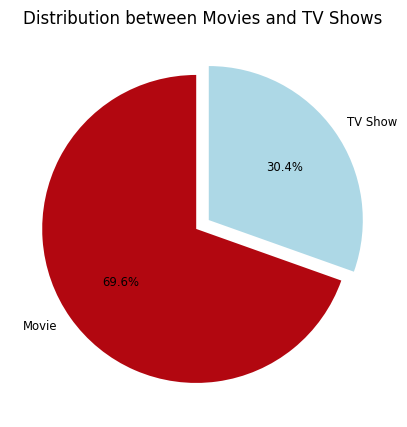

In [46]:
# using piechart
plt.figure(figsize=(8,5))
plt.pie(data_type['title'],explode=(0.05,0.05), labels=data_type['type'],colors=['#b20710','#ADD8E6'],
        autopct='%.1f%%', startangle=90,textprops={'size': 'smaller'})
plt.title('Distribution between Movies and TV Shows')
plt.show()

 Observation : We have almost 70:30 ratio of Movies and TV Shows in our data


🎥Genre distribution : category 2 :

*   (a) . For Non-graphical Analysis:




In [47]:
#number of distinct titles on the basis of genre
genre_data = final_df1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values('title',ascending=False)
genre_data

,Genre,title
13,International Movies,2610
49,Dramas,1596
44,Comedies,1209
37,Action & Adventure,854
47,Documentaries,829
9,Dramas,822
53,International TV Shows,774
12,Independent Movies,736
30,TV Dramas,696
20,Romantic Movies,612


(b). For graphical analysis: for genre based data

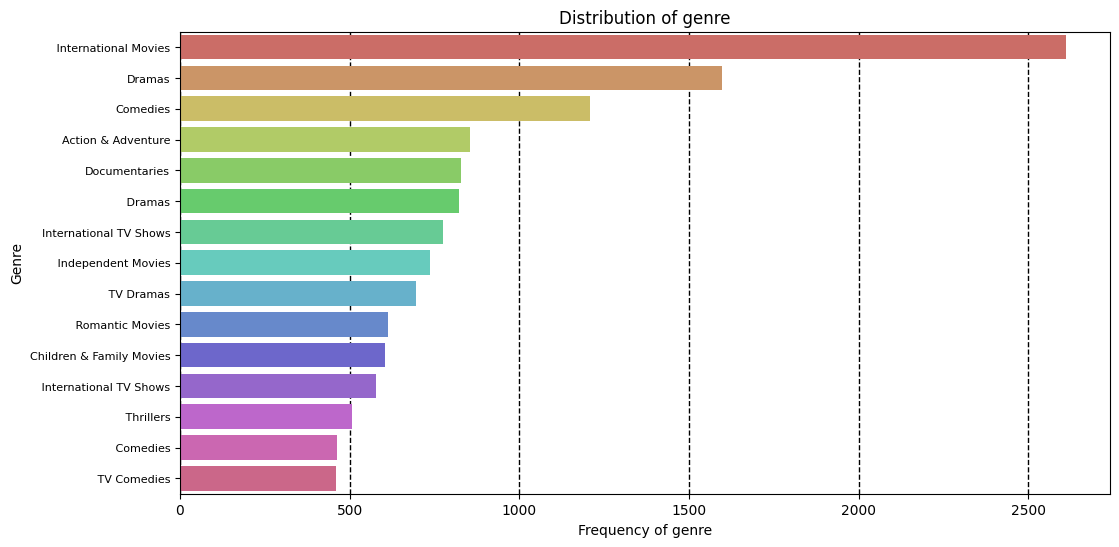

In [48]:
# for graphical represenation we are showing top 15 genre data
gen_15 = genre_data[:15]
plt.figure(figsize=(12,6))
plt.title('Distribution of genre')
plt.xlabel('Frequency of genre')
plt.ylabel('Genre')
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(True, color = "k", linewidth = "1.0", linestyle = "--")
sns.barplot(data=gen_15, y=gen_15['Genre'] , x=gen_15['title'], color='r',palette='hls',hue=gen_15['Genre'],zorder = 2)
plt.show()

🔍 **Insights** : International movies are leading in genre then dramas.

Category 3 : rating based

In [49]:
#number of distinct titles on the basis of rating
df_rating = final_df1.groupby(['rating']).agg({"title":"nunique"}).sort_values('title',ascending=False).reset_index()
df_rating

,rating,title
0,TV-MA,3204
1,TV-14,2151
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,305
7,PG,287
8,TV-G,220
9,NR,87


Graphical representation

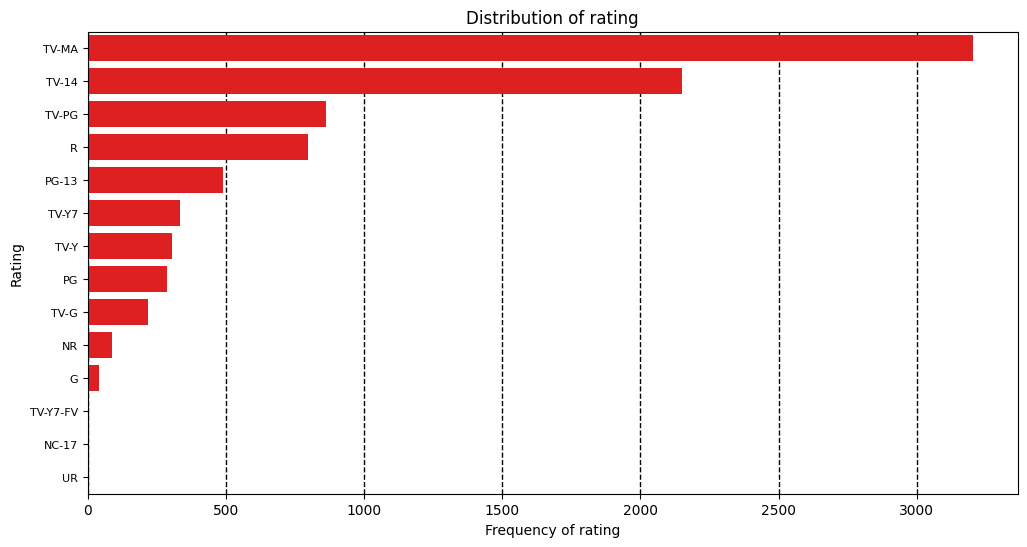

In [50]:
plt.figure(figsize=(12,6))
plt.title('Distribution of rating')
plt.xlabel('Frequency of rating')
plt.ylabel('Rating')
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(True, color = "k", linewidth = "1.0", linestyle = "--")
sns.barplot(data=df_rating, y=df_rating['rating'] , x=df_rating['title'], color='r',zorder = 2)
plt.show()

🔍 Insights :  TV-MA, TV-14, TV-PG are on top by rating.

## **Question 2. Comparison of tv shows vs. movies.**


*   a. Find the number of movies produced in each country and pick the top 10
countries.



In [51]:
final_df1['Country'] = final_df1['Country'].str.strip() # removing unnecesary spaces in country column
final_df1['Country'] = final_df1['Country'].str.replace('nan','Unkown Country') # replacing name with unkown country

df_movie = final_df1.loc[final_df1['type']=='Movie']   # filtered movie type from dataset
df_movie = df_movie.groupby('Country').agg({'title':'nunique'}).sort_values('title',ascending=False).reset_index() # counting and descending by count
df_movie = df_movie.drop(3) # removing unkown country for better understanding
df_movie = df_movie.loc[0:10]  # finally filter top 10 country with count value
df_movie


,Country,title
0,United States,2752
1,India,962
2,United Kingdom,534
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


For graphical analysis:

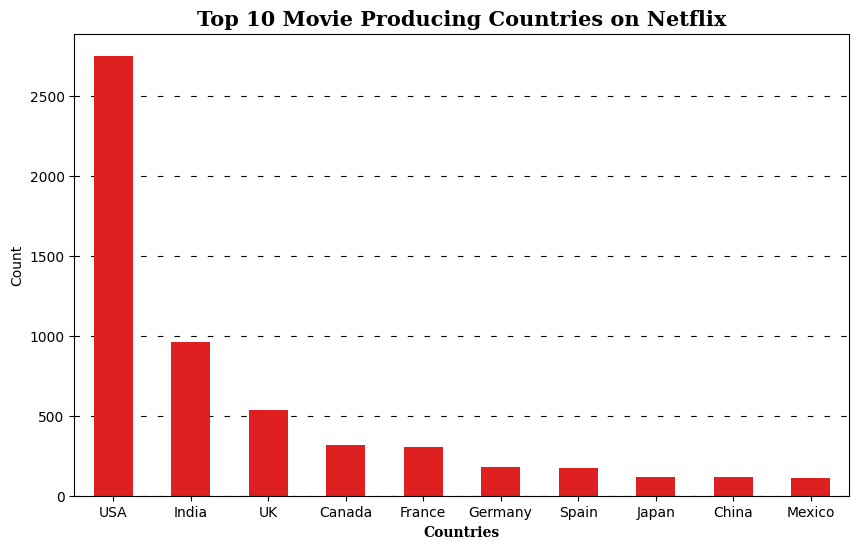

In [52]:
# replacing country names in shortformat
ids={'United States':'USA','United Kingdom':'UK'}
for old,new in ids.items():
  df_movie['Country']= df_movie['Country'].str.replace(old,new,regex=False)

plt.figure(figsize=(10,6))

plt.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))  #setting grid style
plt.ylabel('Count')
plt.xlabel('Countries',{'weight':'bold','fontfamily':'serif'})
plt.title('Top 10 Movie Producing Countries on Netflix',{'font':'serif', 'size':15,'weight':'bold'})
sns.barplot(data=df_movie, x=df_movie['Country'], y=df_movie['title'], color ='r', width=0.5,zorder = 2)
plt.show()

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.


In [53]:

df_tv = final_df1.loc[final_df1['type']=='TV Show']   # filtered TV Shows type from dataset
df_tv = df_tv.groupby('Country').agg({'title':'nunique'}).sort_values('title',ascending=False).reset_index() # counting and descending by count

df_tv = df_tv.drop(1) # removing unkown country for better understanding
df_tv = df_tv.loc[0:10]  # finally filter top 10 country with count value
df_tv

,Country,title
0,United States,938
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66
10,Spain,61


For graphical analysis


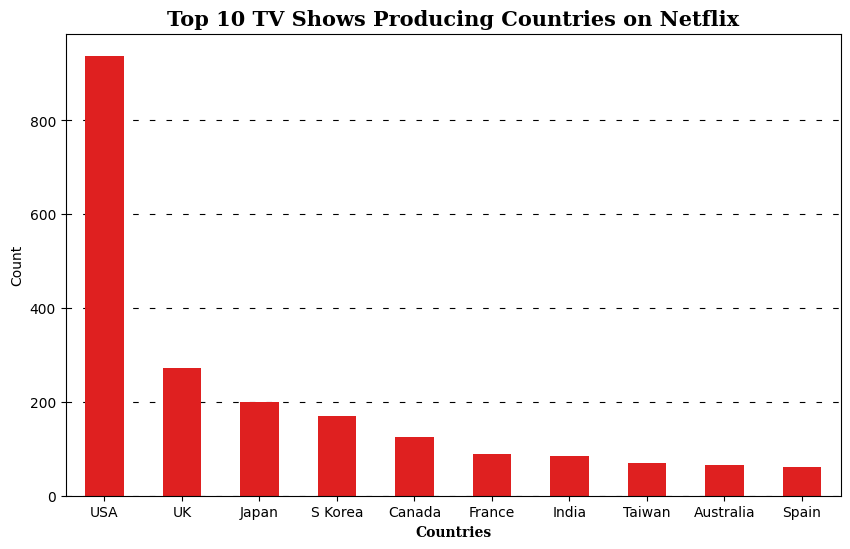

In [54]:
# replacing country names in shortformat
ids={'United States':'USA','United Kingdom':'UK','South Korea':'S Korea'}
for old,new in ids.items():
  df_tv['Country']= df_tv['Country'].str.replace(old,new,regex=False)


plt.figure(figsize=(10,6))

plt.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))  #setting grid style
plt.ylabel('Count')
plt.xlabel('Countries',{'weight':'bold','fontfamily':'serif'})
plt.title('Top 10 TV Shows Producing Countries on Netflix',{'font':'serif', 'size':15,'weight':'bold'})
sns.barplot(data=df_tv, x=df_tv['Country'], y=df_tv['title'], color ='r', width=0.5, zorder = 2)
plt.show()

## 3. What is the best time to launch a TV show?


*  a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies



In [55]:
week = final_df1.groupby('added_week')['type'].value_counts()
week.name='count' # to avoid error
week =week.reset_index()
week.head()

,added_week,type,count
0,1,Movie,8456
1,1,TV Show,1018
2,2,Movie,1618
3,2,TV Show,812
4,3,Movie,2031


In [56]:
week_movie = week.loc[week['type']=='Movie']
week_movie = week_movie.sort_values(by='count',ascending=False)

# fetch week wise data for TV Show
week_tv = week.loc[week['type']=='TV Show'].sort_values(by='count',ascending=False)

print("Movies with week")
print(week_movie.head())
print("     ")
print("TV Shows with week")
print(week_tv.head())

Movies with week
    added_week   type  count
0            1  Movie   8456
86          44  Movie   5563
16           9  Movie   5094
68          35  Movie   5048
50          26  Movie   4931
     
TV Shows with week
    added_week     type  count
53          27  TV Show   2013
69          35  TV Show   1969
51          26  TV Show   1703
47          24  TV Show   1702
61          31  TV Show   1670


Graphical represenation

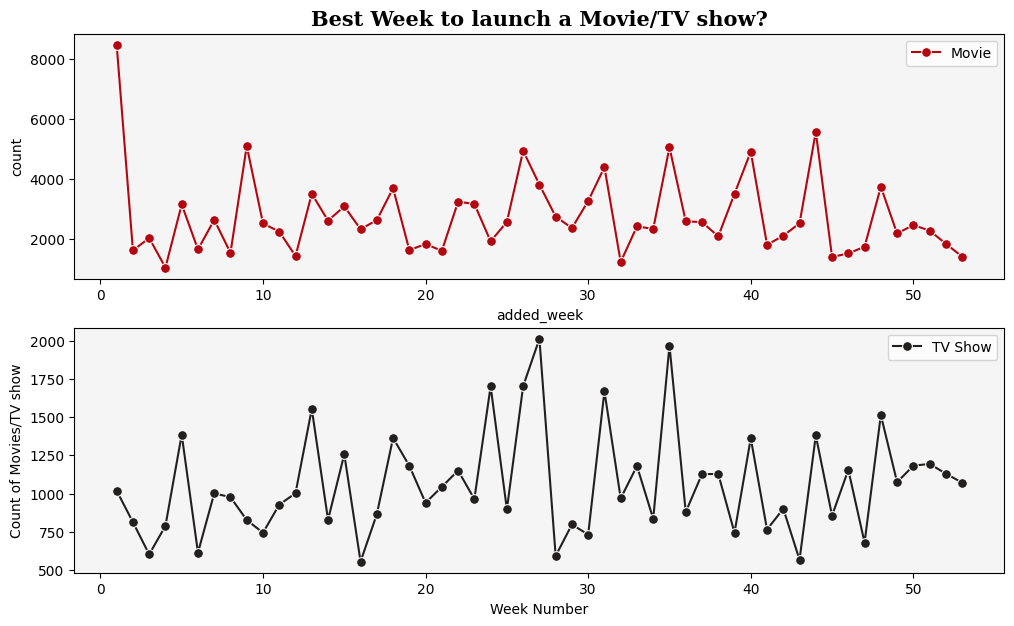

In [57]:
#setting the plot style
fig = plt.figure(figsize = (12,7))
gs = fig.add_gridspec(2,1)

# creating graph for count of movies
ax0 = fig.add_subplot(gs[0,:])
ax0.set_facecolor('#f6f5f5')
sns.lineplot(data = week_movie, x = 'added_week', y = 'count',marker = 'o',markersize =7,color ='#b20710',
             label = 'Movie',ax = ax0)

# creating graph for count of tv shows
ax1 = fig.add_subplot(gs[1,:])
ax1.set_facecolor('#f6f5f5')
sns.lineplot(data = week_tv, x = 'added_week', y = 'count',marker = 'o',markersize = 7,color ='#221f1f',
             label = 'TV Show', ax = ax1)

#creating the title
ax0.set_title('Best Week to launch a Movie/TV show?',
            {'font':'serif', 'size':15,'weight':'bold'})
plt.xlabel('Week Number')
plt.ylabel('Count of Movies/TV show')
plt.show()


**🔎Insights: ** highest movies uploaded during 1st week of year .
and highest TV Shows uploaded during 27th week of year.
**🔉 Recommendations : **
The weekly upload count of both Movies and TV shows exhibits a remarkably similar trend with respect to spikes and dips


*   for Movies : we can observed that TV shows spike is down during 6-12 week ,19-23 week and continouse ups-down after 40th week . These week we  can launch more movies for public.
*  for TV Shows : we can see high spike during 1st week of movie ,rest of the weeks are ups-down . so we can launch similarly as per down of movie point week.



## b. Find which is the best month to release the Tv-show or the movie.
## Do the analysis separately for Tv-shows and Movies

In [58]:
month = final_df1.groupby('added_month')['type'].value_counts()
month.name = 'count' # to avoid error while doing reset_index
month = month.reset_index()

# create 2 dataframe for movies and tv shows

month_movie = month.loc[month['type']=='Movie'].sort_values(by='count',ascending=False)
print("movie details by month")
print(month_movie.head())
print('===============')
month_tv = month.loc[month['type']=='TV Show'].sort_values(by='count',ascending=False)
print('==TV Show details by month==')
month_tv.head()


movie details by month
    added_month   type  count
12            7  Movie  15075
0             1  Movie  13947
18           10  Movie  13541
16            9  Movie  13220
22           12  Movie  12768
==TV Show details by month==


,added_month,type,count
23,12,TV Show,5498
13,7,TV Show,5309
15,8,TV Show,5186
11,6,TV Show,5043
17,9,TV Show,4924


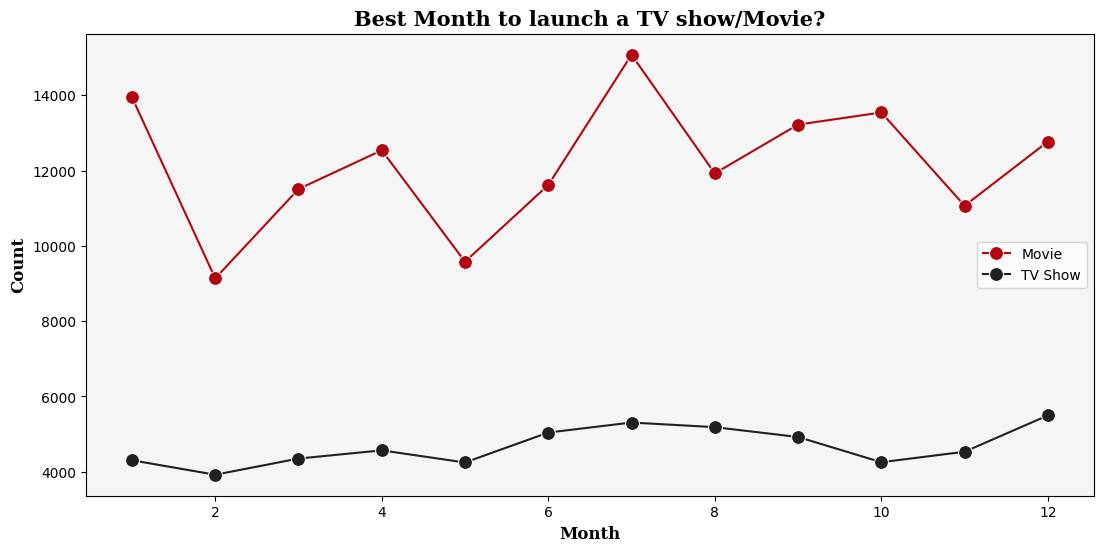

In [59]:
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))
ax.set_facecolor('#f6f5f5')

#creating the plot
sns.lineplot(data = month_movie, x = 'added_month', y = 'count',marker = 'o',markersize = 10,color ='#b20710',label = 'Movie',ax = ax)
sns.lineplot(data = month_tv, x = 'added_month', y = 'count',marker = 'o',markersize = 10,color ='#221f1f',label = 'TV Show', ax = ax)

#customizing the axis ticks
#ax.set_xticklabels(month_movie['added_month'],fontweight = 'bold',fontfamily='serif')

#customizing axis label
plt.xlabel('Month',fontweight = 'bold',fontfamily='serif',fontsize = 12)
plt.ylabel('Count',fontweight = 'bold',fontfamily='serif',fontsize = 12)

#customizing legend
plt.legend(loc = 'center right')

#creating the title
ax.set_title('Best Month to launch a TV show/Movie?',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**🔎 Insights : ** As per observation , less movie uploaded in February,May,August,November month so we can focus to release more TV shows on these months.



---



---


## Question 4. Analysis of actors/directors of different types of shows/movies.

a. Identify the top 10 actors who have appeared in most movies or TV shows

In [60]:
act10 = final_df1.groupby('Actors')['title'].nunique().sort_values(ascending=False)
# removing unkown actor
a_10 = act10[1:11].reset_index()
a_10

,Actors,title
0,Anupam Kher,39
1,Rupa Bhimani,31
2,Takahiro Sakurai,30
3,Julie Tejwani,28
4,Om Puri,27
5,Shah Rukh Khan,26
6,Rajesh Kava,26
7,Andrea Libman,25
8,Paresh Rawal,25
9,Boman Irani,25


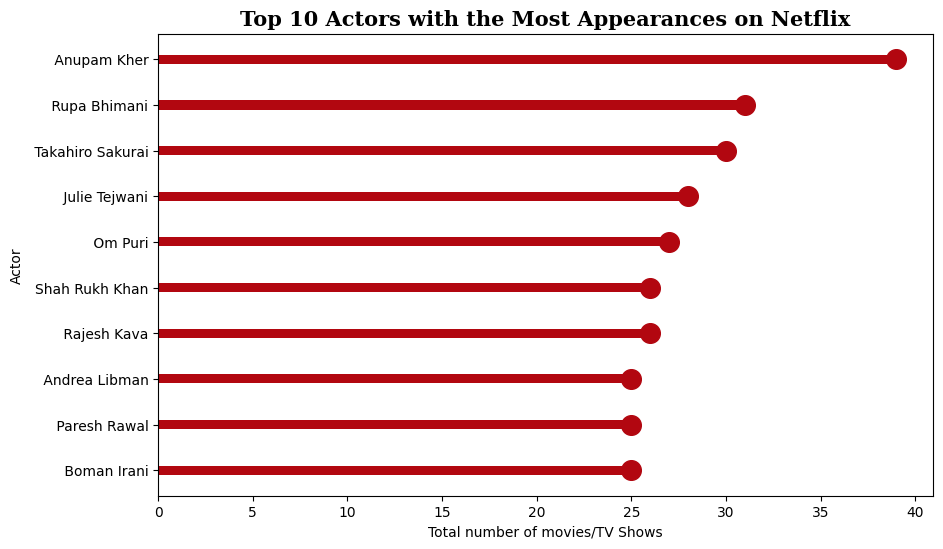

In [61]:
act_data = a_10[::-1] # sorting
#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))
#creating the plot
ax.barh(y = act_data['Actors'],width =act_data['title'],height = 0.2,color = '#b20710')
ax.scatter(y = act_data['Actors'], x = act_data['title'] , s = 200 , color = '#b20710' )
plt.xlabel('Total number of movies/TV Shows')
plt.ylabel('Actor')
#creating the title
plt.title('Top 10 Actors with the Most Appearances on Netflix',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

🔍 **Insights :**  Significantly, 8 out of the top 10 Actors/Cast with the highest number of appearances on Netflix are of Indian origin.


b. Identify the top 10 directors who have appeared in most movies or TV shows.

In [62]:
dir10 = final_df1.groupby('Directors')['title'].nunique().sort_values(ascending=False)
# excluding unkown director from dataset
d_10 =dir10[1:11].reset_index()
d_10

,Directors,title
0,Rajiv Chilaka,22
1,Raúl Campos,18
2,Jan Suter,18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12
9,Youssef Chahine,12


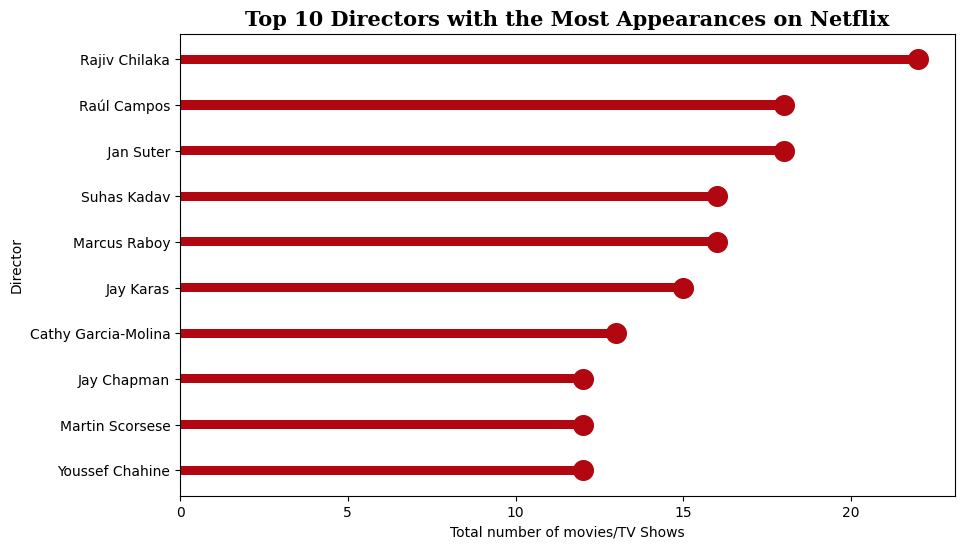

In [63]:
dir_data = d_10[::-1] # sorting
#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))
#creating the plot
ax.barh(y = dir_data['Directors'],width =dir_data['title'],height = 0.2,color = '#b20710')
ax.scatter(y = dir_data['Directors'], x = dir_data['title'] , s = 200 , color = '#b20710' )
plt.xlabel('Total number of movies/TV Shows')
plt.ylabel('Director')
#creating the title
plt.title('Top 10 Directors with the Most Appearances on Netflix',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

🔍 Insights:  we found that movies or TV shows of Rajiv chilaka appeared most of the time in netflix compare to other director.



---
_________________________________________________________________________
## Question 5. Which genre movies are more popular or produced more


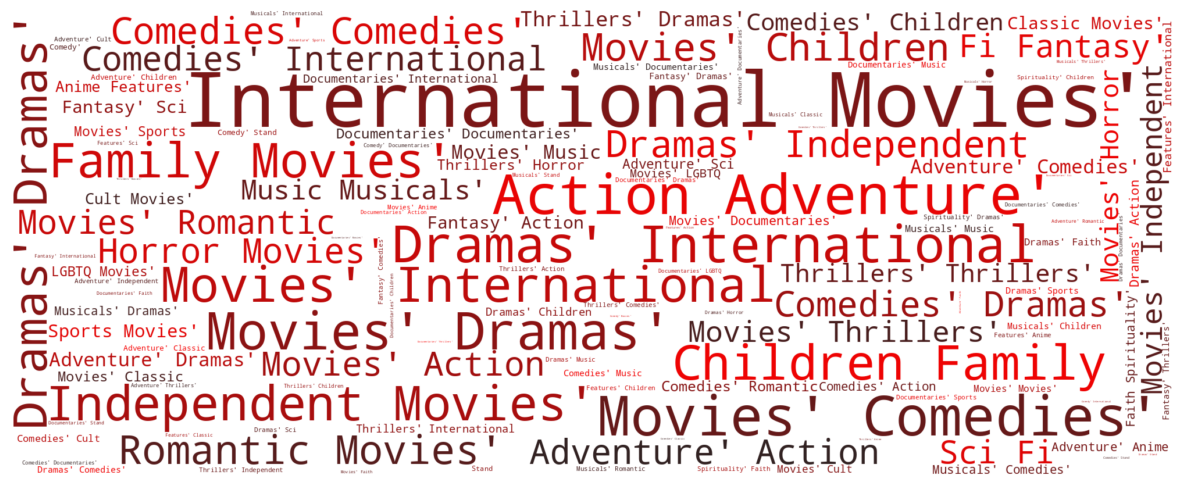

In [64]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

movie_genre = final_df1.loc[final_df1['type']=='Movie'] # filter movie data from orif=ginal dataset
text=str(movie_genre['Genre'].to_list())
color = sns.color_palette("dark:red", as_cmap=True)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2000, height = 800,colormap=color).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

🔎 **Insights:** observed that 'International Movies' are more popular or produced more among all.



---

---



## Question 6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [65]:
# Analysing the time difference between release and added years for Movies

#adding the difference column
final_df1['diff'] = final_df1['added_year']-final_df1['release_year']
# filtered movie data
df_movie = final_df1.loc[final_df1['type']=='Movie']
df_movie = df_movie.groupby('Country')['title'].nunique().sort_values(ascending=False).reset_index()
#droping unkown country column
df_movie.drop(3,inplace=True)
# here we have total 124 countries , so we are selecting top 10 countries based on number of movie publish to netflix
df_movie = df_movie[0:10]    # since we alredy droped 3rd column , we got 10 movies by indexing 0 to 10

movie_year = final_df1.loc[(final_df1['type']=='Movie') & (final_df1['Country'].isin(df_movie['Country']))]

# calculating the average difference by country
movie_year = movie_year.groupby('Country')['diff'].mean().round().sort_values(ascending=False).reset_index()
movie_year['diff'] = movie_year['diff'].astype('int')   # converting to integer
movie_year

,Country,diff
0,India,8
1,United Kingdom,8
2,United States,8
3,Germany,7
4,France,6
5,Japan,6
6,Canada,5
7,Mexico,5
8,China,4
9,Spain,2


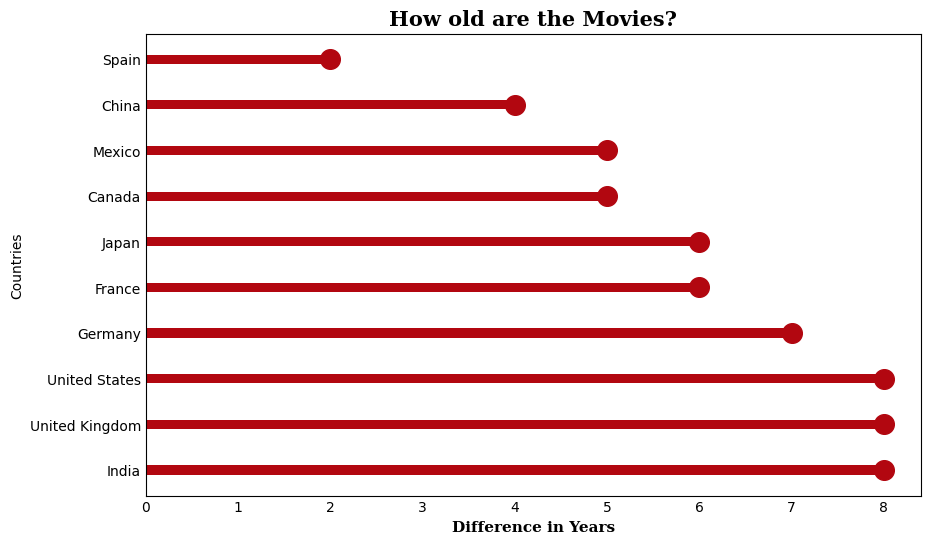

In [66]:
#setting the plot style
fig,ax = plt.subplots(figsize = (10,6))
#creating the plot
ax.barh(y = movie_year['Country'],width =movie_year['diff'],height = 0.2,color = '#b20710')
ax.scatter(y = movie_year['Country'], x = movie_year['diff'] , s = 200 , color = '#b20710' )
plt.xlabel('Difference in Years',fontfamily='serif',fontsize = 11,fontweight = 'bold')
plt.ylabel('Countries')
#removing tick marks but keeping the labels
ax.tick_params(axis = 'both',length = 0)
#creating the title
plt.title('How old are the Movies?',{'font':'serif', 'size':15,'weight':'bold'})
plt.show()

🔍 **Insights:** Countries like India, UK,USA and France have in general more delay in movies (8 to 6 years) .


*   Spain has the lowest delay for movies (2 years)

